# housing-price-forecast

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn.datasets as sd
import sklearn.utils as su
import sklearn.metrics as sm

In [2]:
boston = sd.load_boston()
data = pd.DataFrame(boston.data, columns = boston.feature_names)
# data.info()查看这组数据的信息
# data.describe()查看这组数据的一些概况量，比如：最大值，均值等
data['Target']=boston.target#将target值添加进data数据中最后一列，便于之后的分析
data.head(3)#查看前三行

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [3]:
data['CHAS'].value_counts()
data.pivot_table(index='CHAS', values='Target')

,Target
CHAS,
0.0,22.093843
1.0,28.440000


<AxesSubplot:xlabel='CRIM', ylabel='Target'>

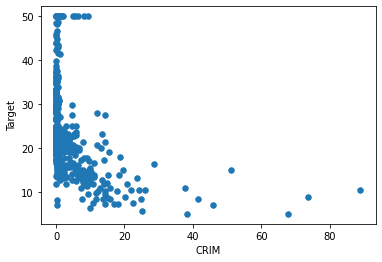

In [4]:
#观察特征与房价之间的关系
data.plot.scatter(x='CRIM',y='Target',s=30)#犯罪率与房价之间的关系走势图

In [5]:
import sklearn.model_selection as ms #几乎所有的前期准备和模型的选择都会在这个包里面出现

# 1.整理输入集和输出集
x, y = data.loc[:, :'LSTAT'], data['Target']
# 2.拆分测试集、训练集
#random_state: 即随机种子，使用相同的种子做多次的随即拆分，会得到相同的结果，后面的值可以自己设定，只要保证每次使用是一样的即可
train_x, test_x, train_y, test_y = \
    ms.train_test_split(x, y, test_size=0.2, random_state=7)
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
# 3. 使用训练集训练模型、使用测试集测试模型，输出模型得分
model = lm.LinearRegression()
model.fit(train_x, train_y)
pred_train_y = model.predict(train_x)
pred_test_y = model.predict(test_x)
print('Training r2:', sm.r2_score(train_y, pred_train_y))
print('Testing r2:', sm.r2_score(test_y, pred_test_y))

Training r2: 0.7698532963729758
Testing r2: 0.5785415472763413


In [7]:
#岭回归
model_Ridge = lm.Ridge(100)
model_Ridge.fit(train_x, train_y)
pred_train_yII = model_Ridge.predict(train_x)
pred_test_yII = model_Ridge.predict(test_x)
print('Training r2:', sm.r2_score(train_y, pred_train_yII))
print('Testing r2:', sm.r2_score(test_y, pred_test_yII))

Training r2: 0.736070155265425
Testing r2: 0.6534834314895364


In [8]:
#多项式回归
import sklearn.pipeline as pl
import sklearn.preprocessing as sp

model = pl.make_pipeline(sp.PolynomialFeatures(2), lm.Ridge(500))
model.fit(train_x, train_y)
pred_train_y = model.predict(train_x)
pred_test_y = model.predict(test_x)
print('Training r2:', sm.r2_score(train_y, pred_train_y))
print('Testing r2:', sm.r2_score(test_y, pred_test_y))

Training r2: 0.9182441782990111
Testing r2: 0.7577255457040512


In [9]:
#决策树回归
import sklearn.tree as st
model = st.DecisionTreeRegressor(max_depth = 6, min_samples_split=5)
model.fit(train_x, train_y)
pred_train_y = model.predict(train_x)
pred_test_y = model.predict(test_x)
print('Training r2:', sm.r2_score(train_y, pred_train_y))
print('Testing r2:',sm.r2_score(test_y, pred_test_y))

Training r2: 0.9441689180250539
Testing r2: 0.6861388029010572


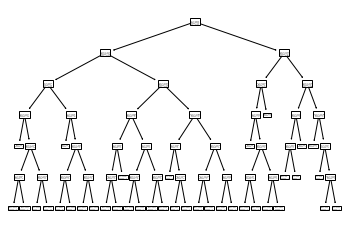

In [10]:
#决策树的可视化.方法一
st.plot_tree(model)
plt.show()

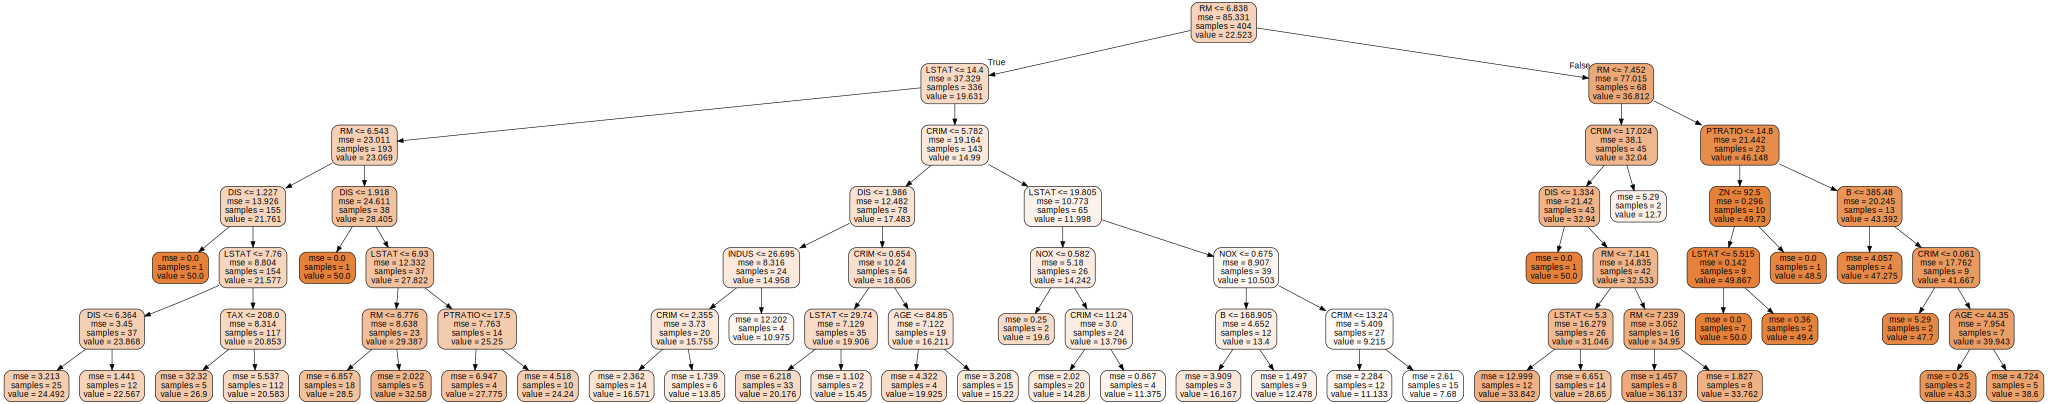

In [11]:
#决策树的可视化.方法二
import graphviz
# import os
# os.environ["PATH"] += os.pathsep + 'E:/Dev_Kits_Python/Graphviz/bin' # 引入路径

dot_data = st.export_graphviz(model, out_file=None, 
                              feature_names = boston.feature_names, 
                              filled = True, rounded = True)
graph = graphviz.Source(dot_data)
graph

In [12]:
#集合算法-AdaBoost
import sklearn.ensemble as se
model = st.DecisionTreeRegressor(max_depth = 4)
model = se.AdaBoostRegressor(model, n_estimators = 500, random_state = 7)
model.fit(train_x, train_y)
pred_train_y = model.predict(train_x)
pred_test_y = model.predict(test_x)
print(sm.r2_score(train_y, pred_train_y))
print(sm.r2_score(test_y, pred_test_y))

0.9497286606262845
0.8475414656807095


<AxesSubplot:>

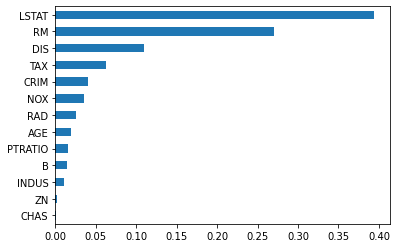

In [13]:
#特征重要性
fi = model.feature_importances_
fi = pd.Series(fi, index = boston.feature_names)
fi.sort_values().plot.barh()

In [14]:
#集合算法-GBDT
model = se.GradientBoostingRegressor(max_depth = 3, n_estimators = 80, min_samples_split = 4)
model.fit(train_x, train_y)
pred_train_y = model.predict(train_x)
pred_test_y = model.predict(test_x)

print(sm.r2_score(train_y, pred_train_y))
print(sm.r2_score(test_y, pred_test_y))
print(sm.mean_absolute_error(test_y, pred_test_y))

0.9733136937337455
0.8673273419940949
2.1225868922043736


In [ ]:
#集合算法-随机森林
model = se.RandomForestRegressor(max_depth = 6, n_estimators = 300, min_samples_split = 3)
model.fit(train_x, train_y)
pred_train_y = model.predict(train_x)
pred_test_y = model.predict(test_x)
print('Random Forest Training r2 Score:', sm.r2_score(train_y, pred_train_y))
print('Random Forest Testing r2 Score:', sm.r2_score(test_y, pred_test_y))

In [19]:
#集合算法-随机森林
model = se.RandomForestRegressor(max_depth = 6, n_estimators = 300, min_samples_split = 3)
model.fit(train_x, train_y)
pred_train_y = model.predict(train_x)
pred_test_y = model.predict(test_x)
print('Random Forest Training r2 Score:', sm.r2_score(train_y, pred_train_y))
print('Random Forest Testing r2 Score:', sm.r2_score(test_y, pred_test_y))

Random Forest Training r2 Score: 0.9539729281862981
Random Forest Testing r2 Score: 0.8104485101035592
